# Numerical Differentation

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import sympy as sp

## Example: Analytical functions:

Find the derivative of:

$y(t) = 2 + 3\,t^2$


In [2]:
def y(t):
    return 2 + 3*t**2

## 1. Find derivatives using symbolic algebra:

In [3]:
t = sp.symbols('t')

In [4]:
def deriv_t(t):
    return sp.diff(y(t), t)

In [5]:
print(deriv_t)

<function deriv_t at 0x11b06a0e0>


In [6]:
deriv_t2 = sp.lambdify(t, deriv_t(t), "numpy")

In [7]:
print(deriv_t2)

<function _lambdifygenerated at 0x11b1df0e0>


### Result:

In [8]:
print(deriv_t2(t))

6*t


### Plots:

In [9]:
t_axis = np.arange(0, 10, 0.1)

In [10]:
y_axis = y(t_axis)

#print(y_axis)

y_deriv = deriv_t2(t_axis)

print(y_deriv)

[ 0.   0.6  1.2  1.8  2.4  3.   3.6  4.2  4.8  5.4  6.   6.6  7.2  7.8
  8.4  9.   9.6 10.2 10.8 11.4 12.  12.6 13.2 13.8 14.4 15.  15.6 16.2
 16.8 17.4 18.  18.6 19.2 19.8 20.4 21.  21.6 22.2 22.8 23.4 24.  24.6
 25.2 25.8 26.4 27.  27.6 28.2 28.8 29.4 30.  30.6 31.2 31.8 32.4 33.
 33.6 34.2 34.8 35.4 36.  36.6 37.2 37.8 38.4 39.  39.6 40.2 40.8 41.4
 42.  42.6 43.2 43.8 44.4 45.  45.6 46.2 46.8 47.4 48.  48.6 49.2 49.8
 50.4 51.  51.6 52.2 52.8 53.4 54.  54.6 55.2 55.8 56.4 57.  57.6 58.2
 58.8 59.4]


### Original function:

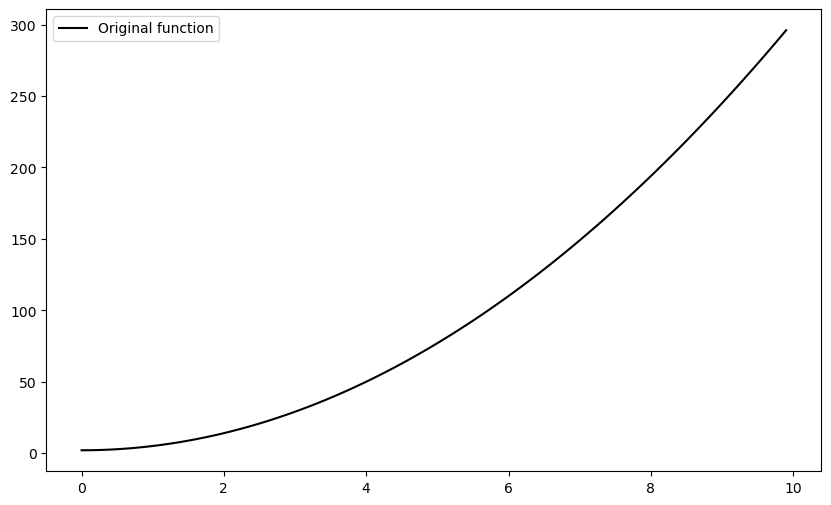

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(t_axis, y(t_axis), color ="black", linestyle="-", label='Original function') # Original data
ax.legend()
plt.show()

### Derivative:

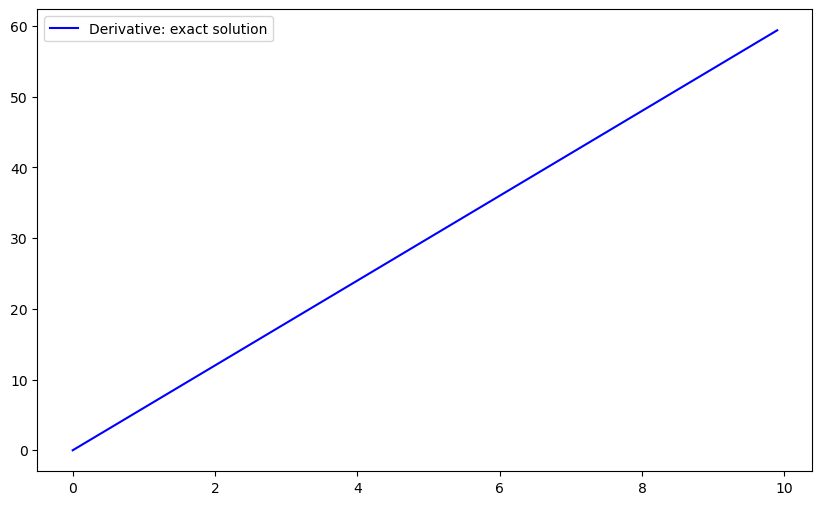

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(t_axis, deriv_t2(t_axis), color ="blue", linestyle="-", label='Derivative: exact solution') # Original data
ax.legend()
plt.show()

## 2. Find derivatives using forward differences:

We use this definition for forward differences:

$f'(x) \approx \frac{f(x+h) - f(x)}{h}$

In [13]:
# Step size
h = 0.5

forward_diff = (y(t_axis + h) - y(t_axis))/(h)

In [14]:
print(forward_diff)

[ 1.5  2.1  2.7  3.3  3.9  4.5  5.1  5.7  6.3  6.9  7.5  8.1  8.7  9.3
  9.9 10.5 11.1 11.7 12.3 12.9 13.5 14.1 14.7 15.3 15.9 16.5 17.1 17.7
 18.3 18.9 19.5 20.1 20.7 21.3 21.9 22.5 23.1 23.7 24.3 24.9 25.5 26.1
 26.7 27.3 27.9 28.5 29.1 29.7 30.3 30.9 31.5 32.1 32.7 33.3 33.9 34.5
 35.1 35.7 36.3 36.9 37.5 38.1 38.7 39.3 39.9 40.5 41.1 41.7 42.3 42.9
 43.5 44.1 44.7 45.3 45.9 46.5 47.1 47.7 48.3 48.9 49.5 50.1 50.7 51.3
 51.9 52.5 53.1 53.7 54.3 54.9 55.5 56.1 56.7 57.3 57.9 58.5 59.1 59.7
 60.3 60.9]


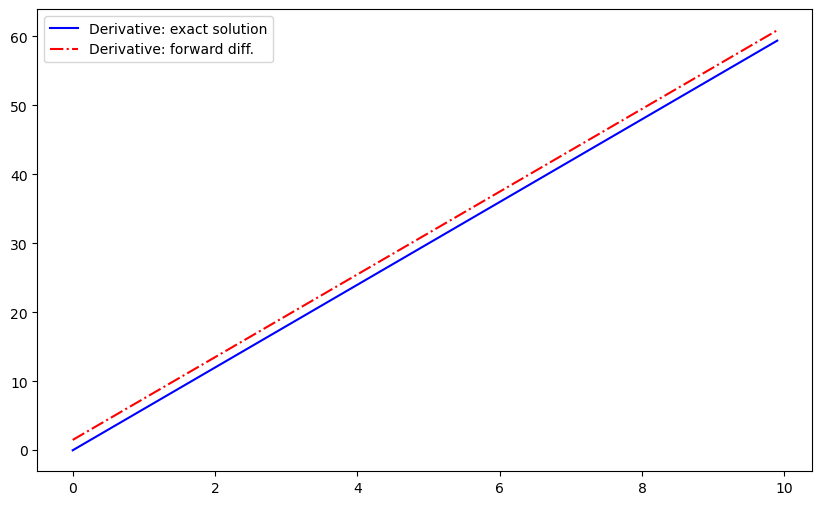

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(t_axis, deriv_t2(t_axis), color ="blue", linestyle="-", label='Derivative: exact solution') # Original data
ax.plot(t_axis, forward_diff, color ="red", linestyle="-.", label='Derivative: forward diff.') # Original data

ax.legend()
plt.show()

## 3. Find derivatives using backward differences:

We use this definition for forward differences:

$f'(x) \approx \frac{f(x-h) - f(x)}{-h}$

In [16]:
backward_diff = (y(t_axis - h) - y(t_axis))/(-h)

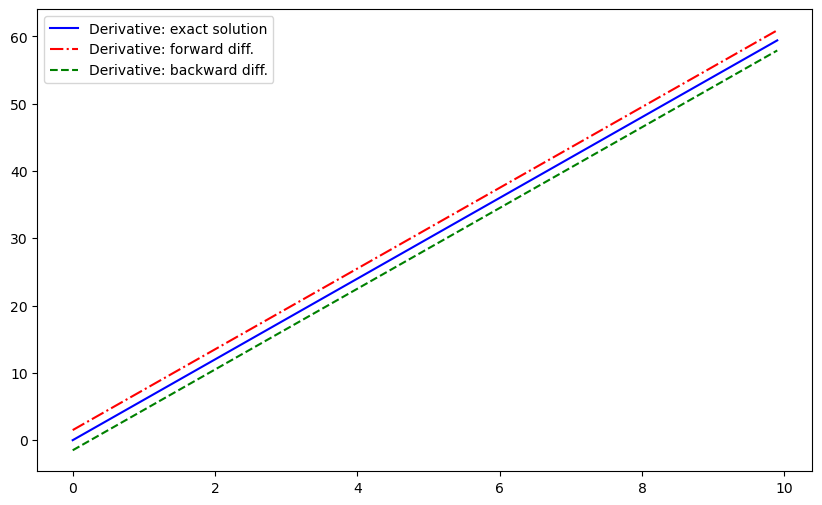

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(t_axis, deriv_t2(t_axis), color ="blue", linestyle="-", label='Derivative: exact solution') # Original data
ax.plot(t_axis, forward_diff, color ="red", linestyle="-.", label='Derivative: forward diff.') # Original data
ax.plot(t_axis, backward_diff, color ="green", linestyle="--", label='Derivative: backward diff.') # Original data

ax.legend()
plt.show()

## 4. Find derivatives using central differences:

We use this definition for central differences:

$f'(x) \approx \frac{f(x+h/2) - f(x-h/2)}{h}$


In [18]:
central_diff = (y(t_axis + h/2) - y(t_axis - h/2))/(h)

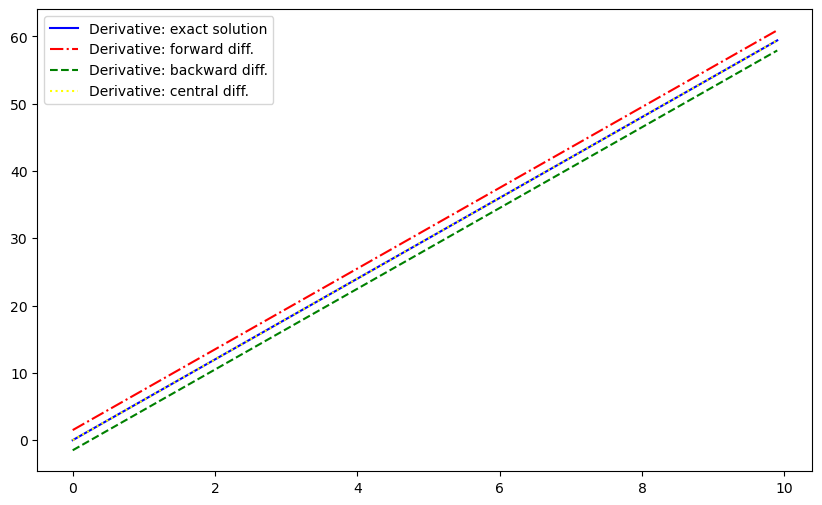

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(t_axis, deriv_t2(t_axis), color ="blue", linestyle="-", label='Derivative: exact solution') # Original data
ax.plot(t_axis, forward_diff, color ="red", linestyle="-.", label='Derivative: forward diff.') # Original data
ax.plot(t_axis, backward_diff, color ="green", linestyle="--", label='Derivative: backward diff.') # Original data
ax.plot(t_axis, central_diff, color ="yellow", linestyle=":", label='Derivative: central diff.') # Original data

ax.legend()
plt.show()

## 5. Find derivatives using shifted arrays

In [20]:
print(t_axis.shape)

(100,)


In [21]:
print(y_axis.shape)

(100,)


### Shifted arrays:

In [22]:
t_left  = t_axis[1:]
t_right = t_axis[:-1]

y_left  = y_axis[1:]
y_right = y_axis[:-1]

In [23]:
print(t_axis.shape)

(100,)


In [24]:
print(t_right.shape)

(99,)


### Derivative:

In [25]:
deriv_y = (y_right - y_left)/(t_right - t_left)

In [26]:
print(deriv_y.shape)

(99,)


### Mid-points:

In [27]:
t_mid = 0.5*(t_right + t_left)

In [28]:
print(t_mid.shape)

(99,)


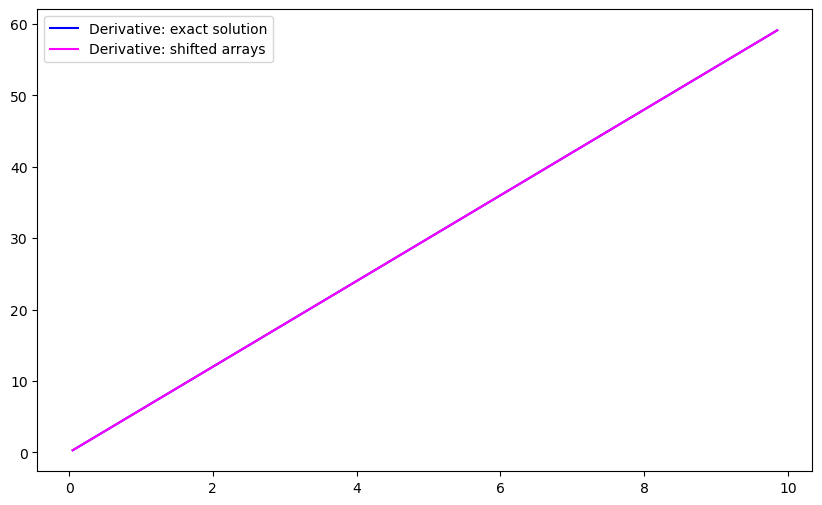

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(t_mid, deriv_t2(t_mid), color ="blue", linestyle="-", label='Derivative: exact solution') # Original data
#ax.plot(t_axis, forward_diff, color ="red", linestyle="-.", label='Derivative: forward diff.') # Original data
#ax.plot(t_axis, backward_diff, color ="green", linestyle="--", label='Derivative: backward diff.') # Original data
#ax.plot(t_axis, central_diff, color ="yellow", linestyle=":", label='Derivative: central diff.') # Original data
ax.plot(t_mid, deriv_y, color ="magenta", linestyle="-", label='Derivative: shifted arrays') # Original data

ax.legend()
plt.show()